<a href="https://colab.research.google.com/github/Elma-dev/fast_ai/blob/main/fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
URLs.FLOWERS #fast ai data set urls

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz'

In [ ]:
from_url=URLs.PETS
data_path=untar_data(from_url)/"images" #extract data from urls and return the path object location

In [ ]:
data_path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
def is_cat(x):
  return x[0].isupper() # return the labels cats based on a filename ->start with an uppercase letter if the image is a cat, and a lowercase letter otherwise.

In [ ]:
dls=ImageDataLoaders.from_name_func(  #Load Image Data -> from_name_func (which means that filenames can be extracted using a function applied to the filename)
    data_path,                        #Path Of our Data
    get_image_files(data_path),       #Get All into the Path
    label_func=is_cat,                #Label Our data including the filename
    item_tfms=Resize(224),            #Resize each image
    valid_pct=0.2,                    #Splite data
    seed=42
)

In [ ]:
learner=cnn_learner(dls,resnet18,metrics=error_rate) #error_rate:tells you what percentage of images in the validation set are being classi‐ fied incorrectly.
# Another common metric for classification is accuracy (which is just 1.0 - error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learner.fine_tune(1) #how to fit the model =>fine_tune: important tricks to adapt a pretrained model for a new dataset—a process called fine-tuning
#Using fine tunning tricks to train the preteined model
#Use one epoch to fit just those parts of the model necessary to get the new ran‐ dom head to work correctly with your dataset
#

epoch,train_loss,valid_loss,error_rate,time
0,0.079377,0.066037,0.017591,19:38


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.048763,0.022196,0.007442,27:48


# Segmentation
- Create A model that can recognize the content of every individual pixel in an image.
- for example recognize a pedesterian by the car from an image

In [4]:
path=untar_data(URLs.CAMVID_TINY) #Get Data From CamVid dataset

In [5]:
dls=SegmentationDataLoaders.from_label_func(
  path,
  fnames=get_image_files(path/"images"),
  label_func=lambda o:path/"labels"/f'{o.stem}_P{o.suffix}',
  codes=np.loadtxt(path/'codes.txt',dtype=str),
  bs=8
)

In [7]:
learner=unet_learner(dls,resnet34)
learner.fine_tune(1)

epoch,train_loss,valid_loss,time
0,4.114753,2.580658,01:17


epoch,train_loss,valid_loss,time
0,1.861354,1.707278,01:39


**We can visualize how well it achieved its task by asking the model to color-code each
pixel of an image.**

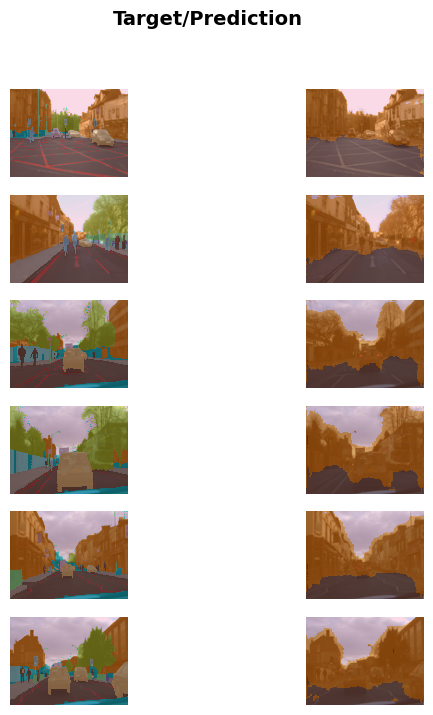

In [8]:
learner.show_results(max_n=6,figsize=(7,8)) #

#NLP
* Computers can now generate text, translate
automatically from one language to another, analyze comments, label words in
sentences, and much more.

In [9]:
from fastai.text.all import *
data=untar_data(URLs.IMDB)
dls=TextDataLoaders.from_folder(data,valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5,metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [ ]:
learn.predict("I really liked that kind of movies!")

# TAbular

In [11]:
from fastai.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)
dls=TabularDataLoaders.from_csv(path/"adult.csv",
                                path=path,
                                y_names="salary",
                                cat_names=["workclass","education","marital-status","occupation","relationship","race"],
                                cont_names=["age","fnlwgt","education-num"],
                                procs=[Categorify,FillMissing,Normalize]
                                )

In [12]:
learn=tabular_learner(dls,metrics=accuracy)

In [13]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.395188,0.362158,0.836763,00:05
1,0.370029,0.349412,0.839527,00:04
2,0.354731,0.345070,0.839834,00:04


# Recommandation System


In [14]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5)) #This model is predicting movie ratings on a scale of 0.5 to 5.0
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.522145,1.376003,00:00


epoch,train_loss,valid_loss,time
0,1.390377,1.321077,00:00
1,1.283126,1.154016,00:00
2,1.042887,0.863664,00:00
3,0.799616,0.730683,00:00
4,0.682758,0.699489,00:00
5,0.638811,0.689011,00:00
6,0.623489,0.685407,00:00
7,0.605615,0.682631,00:00
8,0.601298,0.681683,00:00
9,0.602982,0.681643,00:00


In [16]:
learn.show_results(max_n=6)

,userId,movieId,rating,rating_pred
0,98.0,82.0,4.5,4.577796
1,6.0,62.0,3.5,3.967165
2,80.0,9.0,4.0,3.630063
3,65.0,62.0,5.0,4.112568
4,36.0,99.0,4.5,4.216041
5,86.0,76.0,3.5,3.874637
